In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Import the dataset
tweet = pd.read_csv("volvo701-1001.csv")
tweet=tweet.replace(' ', np.nan)
tweet['Tweet_time']

0        2020-09-30 20:40:23
1        2020-10-24 15:05:24
2        2020-09-30 20:58:51
3        2020-09-30 20:15:12
4        2020-09-30 23:30:41
                ...         
14481    2020-07-01 02:55:38
14482    2020-07-01 02:33:46
14483    2020-07-01 03:15:58
14484    2020-07-01 02:43:33
14485    2020-07-01 04:13:01
Name: Tweet_time, Length: 14486, dtype: object

In [3]:
# EDA-IK

### Find the number of followers for the top 10 most active users

In [5]:
user_count = tweet['Tweet_username'].value_counts()
top_user_count = user_count.head(10)
top_username = top_user_count.index
top_username
for name in top_username:
    follower_num = tweet[tweet['Tweet_username'] == name].iloc[0, 6]
    print("The number of followers of", name, "is", follower_num)

The number of followers of Frost Bank is 21156
The number of followers of Swedish Steel 4 Sale is 2
The number of followers of Dr.mewithaPhd is 120
The number of followers of Porcellato Engineering is 26267
The number of followers of Zamzam Auto Co. is 297
The number of followers of John Clark Volvo is 221
The number of followers of Alex von Witzleben is 11758
The number of followers of cheap cars for cheap is 37
The number of followers of FinditParts.com is 1349
The number of followers of TruckerToTrucker.com is 11726


In [6]:
volvo_US = tweet[tweet["Tweet_country_code"] == "US"]
location_list = []
for location in volvo_US["Tweet_location"]:
    location_list += location[-2:].upper()

#volvo_US["Tweet_location"] = location
#volvo_US.replace(volvo_US["Tweet_location"], location)
location

'Minneapolis, MN'

In [7]:
car_model = ["S60", "XC40", "s60", "XC90", "XC60", "xc90", "T6"]
S60_count = 0
XC40_count = 0
XC90_count = 0
XC60_count = 0
T6_count = 0
clean_words2 = ' '.join(volvo_US['Tweet_content'].dropna().astype(str))
splitted = clean_words2.split(" ")
for tweets in splitted:
    if (tweets == (car_model[0] or car_model[2])):
        S60_count += 1
    if (tweets == (car_model[3] or car_model[5])):
        XC90_count += 1
    if (tweets == car_model[1]):
        XC40_count += 1
    if (tweets == car_model[4]):
        XC60_count += 1
    if (tweets == car_model[6]):
        T6_count += 1
print("The frequency for " + car_model[0] + " is " + str(S60_count))
print("The frequency for " + car_model[1] + " is " + str(XC40_count))
print("The frequency for " + car_model[3] + " is " + str(XC90_count))
print("The frequency for " + car_model[4] + " is " + str(XC60_count))
print("The frequency for " + car_model[6] + " is " + str(T6_count))

The frequency for S60 is 18
The frequency for XC40 is 7
The frequency for XC90 is 22
The frequency for XC60 is 0
The frequency for T6 is 8


# More EDA-EC


In [10]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [11]:
# Example
blob1 = TextBlob(tweet['Tweet_content'][0])
print(blob1.sentiment)

Sentiment(polarity=1.0, subjectivity=0.3)


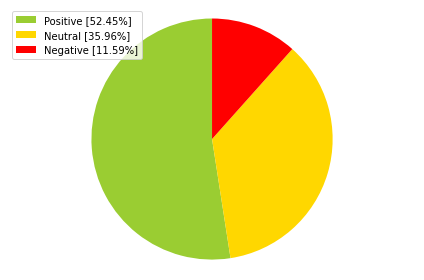

In [12]:
# Breaking down percentage of Positive, Neutral, Negative tweets within our dataset
tweet_content = tweet['Tweet_content'].values.tolist()

positive = 0
neutral = 0
negative = 0
polarity = 0

def percentage(part, whole):
    return 100* float(part)/float(whole)

for t in tweet_content:
    analysis = TextBlob(t)
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral += 1
    if (analysis.sentiment.polarity > 0.00):
        positive += 1
    if (analysis.sentiment.polarity < 0.00):
        negative += 1

total = len(tweet_content)
        
positive = percentage(positive, total)
neutral = percentage(neutral, total)
negative = percentage(negative, total)

positive = format(positive, '.2f')
neutral = format(neutral, '.2f')
negative = format(negative, '.2f')

labels = ["Positive ["+str(positive)+"%]","Neutral ["+str(neutral)+"%]","Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ['yellowgreen','gold','red']
patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [13]:
# Further breaking down each segment and adding labels
tweet_sentiment = tweet_content.copy()
for i in np.arange(total):
    analysis = TextBlob(tweet_sentiment[i])
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        tweet_sentiment[i] = 'Neutral'
    if (0 < analysis.sentiment.polarity <= 0.50):
        tweet_sentiment[i] = 'Slightly Positive'
    if (0.50 < analysis.sentiment.polarity <= 1.0):
        tweet_sentiment[i] = 'Positive'
    if (-1.0 <= analysis.sentiment.polarity <= -0.50):
        tweet_sentiment[i] = 'Slightly Negative'    
    if (-0.50 < analysis.sentiment.polarity <= 0):
        tweet_sentiment[i] = 'Negative'
        
        
tweet['Tweet_sentiment'] = tweet_sentiment
tweet['Tweet_sentiment']

Solving environment: ...working... done

# All requested packages already installed.



0                 Positive
1        Slightly Positive
2        Slightly Positive
3                 Positive
4        Slightly Positive
               ...        
14481    Slightly Positive
14482             Negative
14483             Negative
14484    Slightly Positive
14485             Negative
Name: Tweet_sentiment, Length: 14486, dtype: object

In [14]:
t2 = tweet[["Tweet_content", "Tweet_sentiment"]]
t2["Tweet_content"] = t2["Tweet_content"].str.lower()
tweet_sentiment2= tweet_content.copy()
for i in np.arange(total):
    analysis2 = TextBlob(tweet_sentiment2[i])
    polarity += analysis2.sentiment.polarity
    tweet_sentiment2[i] = analysis2.sentiment.polarity
t2['Tweet_sentiment2'] = tweet_sentiment2
t2['s60'] = (t2["Tweet_content"].str.lower()
                            .str.contains("s60", regex=False, na=False)
                            .astype(int))
t2 = t2.loc[t2['s60'] == 1, :]
s60_mean = t2["Tweet_sentiment2"].mean()


<ipython-input-14-1fcbdefa7d43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2["Tweet_content"] = t2["Tweet_content"].str.lower()
<ipython-input-14-1fcbdefa7d43>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['Tweet_sentiment2'] = tweet_sentiment2
<ipython-input-14-1fcbdefa7d43>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [15]:
t3 = tweet[["Tweet_content", "Tweet_sentiment"]]
t3["Tweet_content"] = t3["Tweet_content"].str.lower()
tweet_sentiment3= tweet_content.copy()
for i in np.arange(total):
    analysis3 = TextBlob(tweet_sentiment3[i])
    polarity += analysis3.sentiment.polarity
    tweet_sentiment3[i] = analysis3.sentiment.polarity
t3['Tweet_sentiment3'] = tweet_sentiment3
t3['t6'] = (t3["Tweet_content"].str.lower()
                            .str.contains("t6", regex=False, na=False)
                            .astype(int))
t3 = t3.loc[t3['t6'] == 1, :]
t6_mean = t3["Tweet_sentiment3"].mean()
t6_mean

<ipython-input-15-5c748a9ea131>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t3["Tweet_content"] = t3["Tweet_content"].str.lower()
<ipython-input-15-5c748a9ea131>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t3['Tweet_sentiment3'] = tweet_sentiment3
<ipython-input-15-5c748a9ea131>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.1078461823202587

In [16]:
t4 = tweet[["Tweet_content", "Tweet_sentiment"]]
t4["Tweet_content"] = t4["Tweet_content"].str.lower()
tweet_sentiment4= tweet_content.copy()
for i in np.arange(total):
    analysis4 = TextBlob(tweet_sentiment4[i])
    polarity += analysis4.sentiment.polarity
    tweet_sentiment4[i] = analysis4.sentiment.polarity
t4['Tweet_sentiment4'] = tweet_sentiment4
t4['xc60'] = (t4["Tweet_content"].str.lower()
                            .str.contains("xc60", regex=False, na=False)
                            .astype(int))
t4 = t4.loc[t4['xc60'] == 1, :]
xc60_mean = t4["Tweet_sentiment4"].mean()
xc60_mean

<ipython-input-16-e7c22466e421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t4["Tweet_content"] = t4["Tweet_content"].str.lower()
<ipython-input-16-e7c22466e421>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t4['Tweet_sentiment4'] = tweet_sentiment4
<ipython-input-16-e7c22466e421>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.18096759858782144

In [17]:
t5 = tweet[["Tweet_content", "Tweet_sentiment"]]
t5["Tweet_content"] = t5["Tweet_content"].str.lower()
tweet_sentiment5= tweet_content.copy()
for i in np.arange(total):
    analysis5 = TextBlob(tweet_sentiment5[i])
    polarity += analysis5.sentiment.polarity
    tweet_sentiment5[i] = analysis5.sentiment.polarity
t5['Tweet_sentiment5'] = tweet_sentiment5
t5['xc90'] = (t5["Tweet_content"].str.lower()
                            .str.contains("xc90", regex=False, na=False)
                            .astype(int))
t5 = t5.loc[t5['xc90'] == 1, :]
xc90_mean = t5["Tweet_sentiment5"].mean()
xc90_mean

<ipython-input-17-f4f45165d3de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5["Tweet_content"] = t5["Tweet_content"].str.lower()
<ipython-input-17-f4f45165d3de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5['Tweet_sentiment5'] = tweet_sentiment5
<ipython-input-17-f4f45165d3de>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.17436878713079326

In [18]:
t6 = tweet[["Tweet_content", "Tweet_sentiment"]]
t6["Tweet_content"] = t5["Tweet_content"].str.lower()
tweet_sentiment6= tweet_content.copy()
for i in np.arange(total):
    analysis6 = TextBlob(tweet_sentiment6[i])
    polarity += analysis5.sentiment.polarity
    tweet_sentiment6[i] = analysis6.sentiment.polarity
t6['Tweet_sentiment6'] = tweet_sentiment6
t6['xc40'] = (t6["Tweet_content"].str.lower()
                            .str.contains("xc40", regex=False, na=False)
                            .astype(int))
t6 = t6.loc[t6['xc40'] == 1, :]
xc40_mean = t6["Tweet_sentiment6"].mean()
xc40_mean

<ipython-input-18-8d87cfe0c000>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t6["Tweet_content"] = t5["Tweet_content"].str.lower()
<ipython-input-18-8d87cfe0c000>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t6['Tweet_sentiment6'] = tweet_sentiment6
<ipython-input-18-8d87cfe0c000>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

0.10488275890349616

In [19]:
car_model_mean = [s60_mean, t6_mean, xc40_mean, xc60_mean, xc90_mean]
favorable = []
for i in car_model_mean:
    if i <= 0.5:
        favorable += ["Slightly Positive"]
favorable

['Slightly Positive',
 'Slightly Positive',
 'Slightly Positive',
 'Slightly Positive',
 'Slightly Positive']

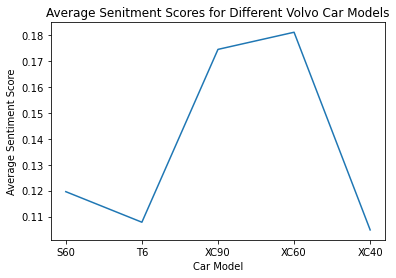

In [20]:
car_model_mean = [s60_mean, t6_mean, xc90_mean, xc60_mean, xc40_mean]
car_model = ["S60", "T6", "XC90", "XC60", "XC40"]
plt.plot(car_model, car_model_mean)
plt.xlabel("Car Model")
plt.ylabel("Average Sentiment Score")
plt.title("Average Senitment Scores for Different Volvo Car Models")
plt.show()